<a href="https://colab.research.google.com/github/NbtKmy/gc_workshops/blob/main/Beautifulsoup_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beautifulsoup?

[Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) ist eine Python-Library, mit der man sehr leicht HTML- oder XML-Dokument "[parsen](https://de.wikipedia.org/wiki/Parser)" kann - d.h. mit Beautifulsoup kann man angenehm gestimmte Information aus HTML- oder XML-Dokument holen.

Weitere Eigenschaften der Library sind im [offiziellen Dokument](https://www.crummy.com/software/BeautifulSoup/) geschrieben:
>- Beautiful Soup provides a few simple methods and Pythonic idioms for navigating, searching, and modifying a parse tree: a toolkit for dissecting a document and extracting what you need. It doesn't take much code to write an application
- Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. You don't have to think about encodings, unless the document doesn't specify an encoding and Beautiful Soup can't detect one. Then you just have to specify the original encoding.
- Beautiful Soup sits on top of popular Python parsers like lxml and html5lib, allowing you to try out different parsing strategies or trade speed for flexibility.


Hier werden wir mal diese Library ausprobieren!


In [1]:
# Wir verwenden lxml als Parser - deshalb installieren wir auch lxml
!pip install -qU beautifulsoup4 lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 2.3 MB/s eta 0:00:00


## Information aus HTML holen

Als Beispiel nehmen wir eine Wikipedia-Seite über [Heidi](https://de.wikipedia.org/wiki/Heidi_(Roman)).
Bevor wir die Daten von der Wikipedia-Seite holen schauen wir die folgende Seite an:

https://de.wikipedia.org/robots.txt


Dieser robots.txt regelt den Zugriff von Web-Crawler auf Wikipedia-Inhalte.
So werden die Seite unter diesem Domain z.B. von hoher Belastung am Server.
Wir machen hier kein Web Crawling, aber es ist wichtig, dass wir benutzerfreundliche Web-Dienstleistung nicht zu sehr belasten...

Laut robots.txt empfehlt Wikipedia die Nutzung des [API-Schnittstelle](https://de.wikipedia.org/api/rest_v1/#/).
Wir verwenden hier diesen Schnittstelle,  um eine Wikipedia-Seite in HTML-Form zu erhalten.

Nach der Beschreibung über API sieht die Query so aus:
```
https://de.wikipedia.org/api/rest_v1/page/html/Heidi_%28Roman%29?redirect=false&stash=false
```
Die komischen Zeichenfolgen wie "%28" oder "%29" sind die Zeichen, die nach [URL-Encode](https://de.wikipedia.org/wiki/URL-Encoding) codiert sind.



In [ ]:
import requests
from bs4 import BeautifulSoup


url = "https://de.wikipedia.org/api/rest_v1/page/html/Heidi_%28Roman%29?redirect=false&stash=false"
wiki_site = requests.get(url)
soup = BeautifulSoup(wiki_site.content, "lxml")
# HTML anzeigen
print(soup)

In [9]:
##########
# find() #
##########

# Einen Tag finden - mit "find("{tag-name}")" kann man einen Tag aus dem HTML-Dokument herausnehmen:
print(soup.find("title"))
# Wenn man nur den Text in dem Tag weiter ".text" hinzufügen:
print(soup.find("title").text)

# so geht's auch:
title_tag = soup.find("title")
print(title_tag.text)



<title>Heidi (Roman)</title>
Heidi (Roman)
Heidi (Roman)
[<h2 id="Bücher"><span id="B.C3.BCcher" typeof="mw:FallbackId"></span>Bücher</h2>, <h2 id="Heidi-Archiv">Heidi-Archiv</h2>, <h2 id="Mögliche_Vorlage"><span id="M.C3.B6gliche_Vorlage" typeof="mw:FallbackId"></span>Mögliche Vorlage</h2>, <h2 id="Abgeleitete_Werke">Abgeleitete Werke</h2>, <h2 id="Sonstige_Vermarktung_und_Werbung">Sonstige Vermarktung und Werbung</h2>, <h2 id="Literatur">Literatur</h2>, <h2 id="Siehe_auch">Siehe auch</h2>, <h2 id="Weblinks">Weblinks</h2>, <h2 id="Einzelnachweise">Einzelnachweise</h2>]


Es gibt sonst noch:
-  find_parent()
- find_next_sibling()
- find_previous_sibling()
- select_one()

Diese Methode gibt nur das erste Element im Dokument zurück.

In [10]:
##############
# find_all() #
##############
# Alle entsprechende Tags finden - Die Tags werden in einer Listenform zurückgegeben
print(soup.find_all("h2"))

# Wenn man alle Text-Elemente herausholen möchte, kann man so verfahren:
all_h2 = soup.find_all("h2")

for e in all_h2:
    print(e.text)

[<h2 id="Bücher"><span id="B.C3.BCcher" typeof="mw:FallbackId"></span>Bücher</h2>, <h2 id="Heidi-Archiv">Heidi-Archiv</h2>, <h2 id="Mögliche_Vorlage"><span id="M.C3.B6gliche_Vorlage" typeof="mw:FallbackId"></span>Mögliche Vorlage</h2>, <h2 id="Abgeleitete_Werke">Abgeleitete Werke</h2>, <h2 id="Sonstige_Vermarktung_und_Werbung">Sonstige Vermarktung und Werbung</h2>, <h2 id="Literatur">Literatur</h2>, <h2 id="Siehe_auch">Siehe auch</h2>, <h2 id="Weblinks">Weblinks</h2>, <h2 id="Einzelnachweise">Einzelnachweise</h2>]
Bücher
Heidi-Archiv
Mögliche Vorlage
Abgeleitete Werke
Sonstige Vermarktung und Werbung
Literatur
Siehe auch
Weblinks
Einzelnachweise


Es gibt sonst noch:
- find_parents()
- find_next_siblings()
- find_previous_siblings()
- select()

Diese Methoden geben alle Elemente zurück, die zur Suchbedingung passen.

In [31]:
##############################
# filtern nach class oder id #
##############################
s = soup.find_all(id="mwNw")
print("Ergebnis find_all mit id:")
print(s)

t1 = soup.find(id="Hauptfiguren_der_Heidi-Romane")
print("\n Ergebnis find mit id:")
print(t1)

t2 = soup.find(string="Hauptfiguren der Heidi-Romane")
print("\n Ergebnis find mit string:")
print(t2)

pa_t = t2.find_parent("section")
print("\n Ergebnis find_parent")
print(pa_t)


Ergebnis find_all mit id:
[<section data-mw-section-id="4" id="mwNw"><h3 id="Hauptfiguren_der_Heidi-Romane">Hauptfiguren der Heidi-Romane</h3>
<p id="mwOA">Die Namen wurden von Johanna Spyri in der originalen Erstausgabe<sup about="#mwt12" class="mw-ref reference" data-mw='{"name":"ref","attrs":{"name":"Erstausgabe"},"body":{"id":"mw-reference-text-cite_note-Erstausgabe-3"}}' id="cite_ref-Erstausgabe_3-0" rel="dc:references" typeof="mw:Extension/ref"><a href="./Heidi_(Roman)#cite_note-Erstausgabe-3" id="mwOQ" style="counter-reset: mw-Ref 3;"><span class="mw-reflink-text" id="mwOg">[3]</span></a></sup> zum Teil anders geschrieben als heute üblich.</p>
<section data-mw-section-id="5" id="mwOw"><h4 id="Heidi">Heidi</h4>
<p id="mwPA">Heidi, mit Taufnamen <a href="./Adelheid" id="mwPQ" rel="mw:WikiLink" title="Adelheid">Adelheid</a>, ist ein kleines Mädchen, dessen Vater kurz nach ihrer Geburt verunglückt und dessen Mutter verstorben ist. Nachdem sie zuerst bei ihrer Grossmutter und ihrer B

# Kombination ...

Auf der Wikipedia-Seite von Heidi gibt es Auflistung der Figuren. Kann man die Namen der Figuren extrahieren?

In [33]:
t2 = soup.find(string="Hauptfiguren der Heidi-Romane")
pa_t = t2.find_parent("section")

figuren_elem = pa_t.find_all("h4")
for f in figuren_elem:
    print(f.text)

Heidi
Geissenpeter
 Alpöhi, der Grossvater
Klara Sesemann
Herr Sesemann
Frau Sesemann
Fräulein Rottenmeier


## Quiz

Es gibt nicht nur Namen, sondern auch Beschreibungen zu der Figuren. Versucht ihr mal selber die Beschreibungen holen.
Und die Namen und Beschreibungen wie folgt darstellen:

Name : Beschreibung
[...]

In [38]:
# Beispiel
t2 = soup.find(string="Hauptfiguren der Heidi-Romane")
pa_t = t2.find_parent("section")


figuren_elem = pa_t.find_all("h4")
figuren_beschreibung = pa_t.find_all("p")
figuren_beschreibung = figuren_beschreibung[1:]
for i, j in zip(figuren_elem, figuren_beschreibung):
    print(i.text + ": " + j.text)

Heidi: Heidi, mit Taufnamen Adelheid, ist ein kleines Mädchen, dessen Vater kurz nach ihrer Geburt verunglückt und dessen Mutter verstorben ist. Nachdem sie zuerst bei ihrer Grossmutter und ihrer Base Dete gelebt hat, wird sie im Alter von fünf Jahren von Dete auf die Alp zu ihrem Grossvater gebracht. Als sie acht Jahre alt ist, kommt sie gegen den Willen des Grossvaters durch ihre Base als Spielgefährtin von Klara Sesemann nach Frankfurt ins Haus der Familie Sesemann. Nachdem ihr Heimweh nach der Alp und ihrem Grossvater von anderen unbemerkt immer grösser geworden ist und schliesslich sogar zum Schlafwandeln führt, darf sie wieder nach Hause zurückkehren. Durch ihr offenes und freundliches Wesen findet Heidi viele gute Freunde, die Anteil an ihrem Schicksal nehmen. Gegen Ende des zweiten Bandes ist Heidi etwa zehn Jahre alt.
Geissenpeter: Der Geissenpeter (in einigen Bearbeitungen auch als Ziegenpeter bezeichnet) ist zu Beginn des ersten Buches ein elfjähriger Junge, der im Sommer di

## Werte von Attribute holen

In einem HTML-Element gibt es auch die Werte in Attribute wie hier:
```html
 <h3 id="Hauptfiguren_der_Heidi-Romane">Hauptfiguren der Heidi-Romane</h3>
```
Hier in diesem Bespiel hat die Attribute "id" den Wert "Hauptfiguren_der_Heidi-Romane".

Diesen Wert kann man natürlich auch holen.

In [46]:
t2 = soup.find(string="Hauptfiguren der Heidi-Romane")
parent_t2 = t2.find_parent("h3")

# man kann auf zwei Methode den Wert des Attributes "id" holen
print(parent_t2["id"])
print(parent_t2.get("id"))

# Unterschied ist, dass der Error bei der ersten Methode hervorgerufen wird, wenn der Name des nicht vorhandenen Attributes eingegeben ist,
# während die 2te Methode "None" zurückgibt.

#print(parent_t2["class_"]) # ->Dies stoppt die ganze Script
print(parent_t2.get("class_"))

Hauptfiguren_der_Heidi-Romane
Hauptfiguren_der_Heidi-Romane
None


Wenn man ein Bild-Datei haben will?
Wikimedia hat "[User-Agent-Policy](https://meta.wikimedia.org/wiki/User-Agent_policy)". Demnach muss man User-Agent in Header in Request haben.

In [73]:
import requests

# Das erste Bild-Element holen
image = soup.find("img")

# Daraus den Link zu dem Bild erhalten
url = image.get("src")
url = "https:" + url

# Wegen User-Agent-Policy diesen Header noch hinzufügen
headers = {"User-Agent": "CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)"}

# Bilder herunterladen & Speichern
res = requests.get(url, headers=headers)
with open("test.jpg", "wb") as f:
    f.write(res.content)



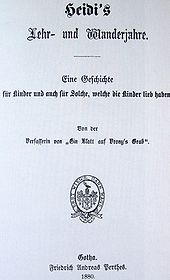

In [74]:
from IPython.display import Image,display_jpeg
display_jpeg(Image("test.jpg"))

Der Prozedre, wie man die Elemente aus dem Dokument holen, ist sowohl bei HTML als auch bei TEI/XML gleich. Wir sind also bereit, die Information aus TEI-Dokument zu holen.

In dem nächsten Schritt schauen wir zuerst die Eigenschaft des TEI-Dokuments. Danach nehmen wir ein Beispiel auf.